In [1]:
#import dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pylab
from matplotlib.font_manager import FontProperties


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
#create an empty dataframe to populate later
results_df = pd.DataFrame(columns=['Tweet Number','Twitter Account','Tweet','Date','Compound','Positive','Negative','Neutral'])

In [5]:
#set target users
target_user = ("@bbc", "@cbs", "@cnn", "@foxnews", "@nytimes")

#create empty lists
account = []
tweet_text = []
date = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_number = []

#loop through all users and append data to lists
for user in target_user:
    counter=1
    for x in range(1, 6):
        public_tweets = api.user_timeline(user, page=x)
        
    
    
        for tweet in public_tweets:
            account.append(tweet['user']['name'])
            tweet_text.append(tweet['text'])
            date.append(tweet['created_at'])
            tweet_number.append(counter)
            counter += 1
            
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
        
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

            


In [6]:
#add lists to dataframe
results_df['Tweet Number']=tweet_number
results_df['Twitter Account']= account
results_df['Tweet']= tweet_text
results_df['Date']= date
results_df['Compound']= compound_list
results_df['Positive']= positive_list
results_df['Negative']= negative_list
results_df['Neutral']= neutral_list


In [8]:
#divide dataframe into twitter account dataframes for plotting
bbc_results_df= results_df.iloc[0:100,:]
cbs_results_df= results_df.iloc[100:200,:]
cnn_results_df= results_df.iloc[200:300,:]
fox_results_df= results_df.iloc[300:400,:]
nyt_results_df= results_df.iloc[400:500,:]

In [9]:
bbc_results_df

,Tweet Number,Twitter Account,Tweet,Date,Compound,Positive,Negative,Neutral
0,1,BBC,"Tonight, @reginalddhunter takes a 2,000-mile m...",Sat Jul 14 19:03:07 +0000 2018,0.0000,0.000,0.000,1.000
1,2,BBC,There's a clear difference in the way boys and...,Sat Jul 14 18:03:04 +0000 2018,0.3818,0.157,0.000,0.843
2,3,BBC,🎾 Angelique Kerber beat seven-time champion Se...,Sat Jul 14 17:32:50 +0000 2018,0.8271,0.372,0.000,0.628
3,4,BBC,RT @BBCSport: Angelique Kerber is the #wimbled...,Sat Jul 14 16:23:10 +0000 2018,0.6688,0.152,0.000,0.848
4,5,BBC,"""We'll definitely keep in touch!"" 👋 *Immediat...",Sat Jul 14 16:03:05 +0000 2018,0.6476,0.362,0.111,0.527
5,6,BBC,A wild banana that may hold the key to protect...,Sat Jul 14 13:03:04 +0000 2018,0.0000,0.000,0.000,1.000
6,7,BBC,There she goes! 🚢 🌊\n\nThe RRS Sir David Atten...,Sat Jul 14 12:10:55 +0000 2018,0.0000,0.000,0.000,1.000
7,8,BBC,RT @bbctennis: Meghan Markle has arrived!\n\nT...,Sat Jul 14 12:08:51 +0000 2018,0.5411,0.127,0.000,0.873
8,9,BBC,We all know a hipster restaurant that's taken ...,Sat Jul 14 12:04:02 +0000 2018,0.0000,0.000,0.000,1.000
9,10,BBC,RT @1Xtra: Tonight 9pm @Drake x @CharlieSloth ...,Sat Jul 14 11:13:46 +0000 2018,0.0000,0.000,0.000,1.000


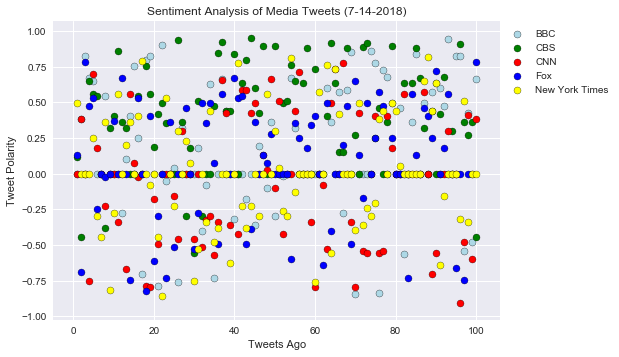

In [25]:
#plot scatterplot
plt.scatter(bbc_results_df['Tweet Number'],bbc_results_df['Compound'], marker = 'o', facecolors = 'lightblue', edgecolors = 'black', label='BBC')
plt.scatter(cbs_results_df['Tweet Number'],cbs_results_df['Compound'], marker = 'o', facecolors = 'green', edgecolors = 'black',label='CBS')
plt.scatter(cnn_results_df['Tweet Number'],cnn_results_df['Compound'], marker = 'o', facecolors = 'red', edgecolors = 'black',label='CNN')
plt.scatter(fox_results_df['Tweet Number'],fox_results_df['Compound'], marker = 'o', facecolors = 'blue', edgecolors = 'black',label='Fox')
plt.scatter(nyt_results_df['Tweet Number'],nyt_results_df['Compound'], marker = 'o', facecolors = 'yellow', edgecolors = 'black',label='New York Times')

plt.style.use('seaborn')

plt.title('Sentiment Analysis of Media Tweets (7-14-2018)')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
pylab.legend(loc=9, bbox_to_anchor=(1.13, 1))

plt.savefig('Sentiment_Analysis_Media_Tweets')

In [11]:
#find averages of compound scores
bbc_average = np.mean(bbc_results_df['Compound'])
cbs_average = np.mean(cbs_results_df['Compound'])
cnn_average = np.mean(cnn_results_df['Compound'])
fox_average = np.mean(fox_results_df['Compound'])
nyt_average = np.mean(nyt_results_df['Compound'])

all_averages = [bbc_average,cbs_average, cnn_average, fox_average, nyt_average]
all_names = ['BBC','CBS', 'CNN', 'FOX','NYT' ]

In [12]:
#create dataframe
all_df = pd.DataFrame(columns=['Twitter Name','Compound Score'])
all_df['Twitter Name']= all_names
all_df['Compound Score']=all_averages

In [16]:
#divide dataframe into twitter account dataframes for plotting

bbc_all_df= all_df.iloc[0:1,:]
cbs_all_df= all_df.iloc[1:2,:]
cnn_all_df= all_df.iloc[2:3,:]
fox_all_df= all_df.iloc[3:4,:]
nyt_all_df= all_df.iloc[4:5,:]

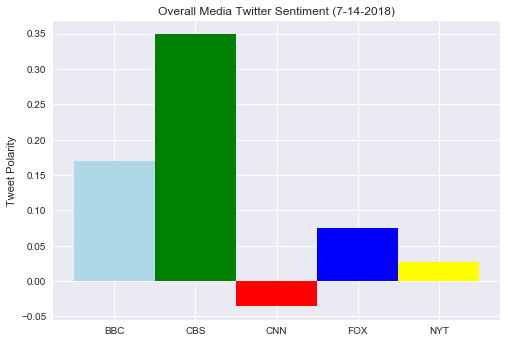

In [26]:
#plot bar graph
plt.bar(bbc_all_df['Twitter Name'],bbc_all_df['Compound Score'],color = 'lightblue',align='center',width=1)
plt.bar(cbs_all_df['Twitter Name'],cbs_all_df['Compound Score'],color = 'green',align='center',width=1)
plt.bar(cnn_all_df['Twitter Name'],cnn_all_df['Compound Score'],color = 'red',align='center',width=1)
plt.bar(fox_all_df['Twitter Name'],fox_all_df['Compound Score'],color = 'blue',align='center',width=1)
plt.bar(nyt_all_df['Twitter Name'],nyt_all_df['Compound Score'],color = 'yellow',align='center',width=1)

plt.style.use('seaborn')

plt.title('Overall Media Twitter Sentiment (7-14-2018)')
plt.ylabel('Tweet Polarity')
plt.savefig('Overall_Sentiment_Analysis_Media_Tweets')

In [ ]:
#Observable Trends:
#CNN currently has the only negative sentiment
#CBS currently is the most positive, with most of their tweets positive
#NYT currently seems to have the most balanced sentiment of tweets, with equal amounts of positive, neutral, and negative tweets.